In [2]:
from tqdm import tqdm
import sys
import importlib
sys.path.append("/home/sambt/analytic-qg-classifiers/analysis/utils/")
from master import *
prefix = '/home/sambt/pythia83-samples/optimal-classifiers/kernel-1/'

In [3]:
importlib.reload(analysis)
CF = 4/3
CA = 3.0
split = r'$P_{q \to qg} \propto e^{z}$'
line_3 = r'$\sqrt{s} = 250$ GeV, $C_F = 4/3$, $C_A = 3$'
pred = r'$\ln(\frac{C_F}{C_A})n^{(0)} + n^{(1)}$'
pred_shan = r'$\ln(\frac{C_F}{C_A})n^{(0)} + n_S^{(1)}$'
f_opt = lambda x : np.log(CF/CA)*np.count_nonzero(x,axis=1) + np.sum(x,axis=1)
f_shan = lambda x : np.log(CF/CA)*np.count_nonzero(x,axis=1) + np.sum(x*np.log(x,where=x>0,out=np.zeros(x.shape)),axis=1)
rocs_r4,aucs_r4,labels_r4 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0010-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_opt,predicted=pred)
rocs_r1,aucs_r1,labels_r1 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sqg0100-esq0010-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_opt,predicted=pred,suffix="/total_1M.root")
rocs_r15,aucs_r15,labels_r15 = analysis.run_pipeline('H2qq-CF1.3CA3.0-sq0100-esq0010-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_opt,predicted=pred)

Loaded files at 0.08286046981811523
Read in arrays at 1.7351572513580322
Cleaned events at 1.8174586296081543
Made quark/gluon input arrays at 1.8767898082733154
Finished preprocessing at 2.5258185863494873
Training PFN
PFN AUC: 0.5990937540063058
Training PFN[z]
PFN[z] AUC: 0.6068074993659249
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6010896712837439
Training EFN
EFN AUC: 0.5831800858557229
Loaded files at 0.1561884880065918
Read in arrays at 16.81925320625305
Cleaned events at 17.60073161125183
Made quark/gluon input arrays at 18.390663862228394
Finished preprocessing at 29.101011753082275
Training PFN
PFN AUC: 0.6097668470069428
Training PFN[z]
PFN[z] AUC: 0.60855355439944
Training PFN[eta,phi]
PFN[eta,phi] AUC: 0.6059459034454271
Training EFN
EFN AUC: 0.5969235300167187
Loaded files at 0.057637691497802734
Read in arrays at 1.727623701095581
Cleaned events at 1.8082122802734375
Made quark/gluon input arrays at 1.8997907638549805
Finished preprocessing at 3.2545363903045654
Training

Text(0.02, 0.35, '$P_{q \\to qg} \\propto e^{z}$')

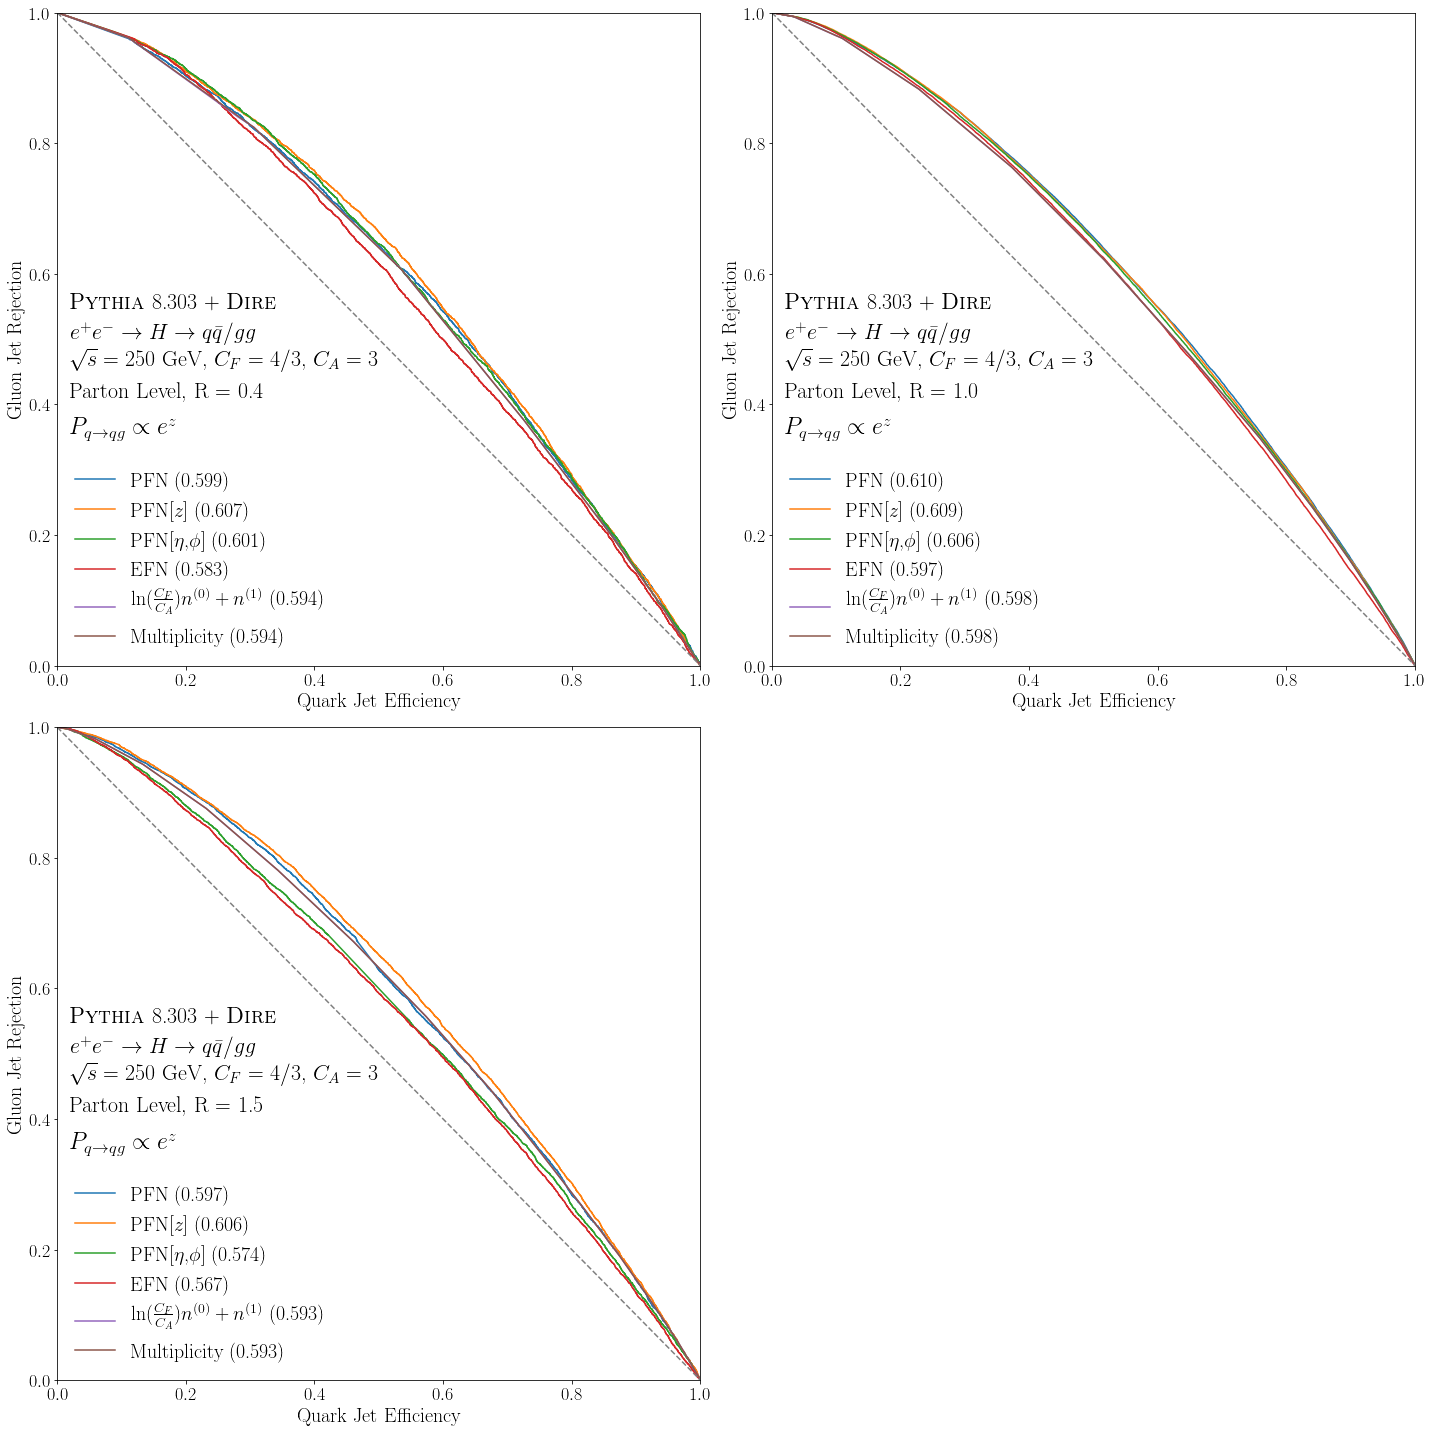

In [4]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20)
plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20)
plotting.stamp(0.02,0.6,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.35,split,fontsize=24)

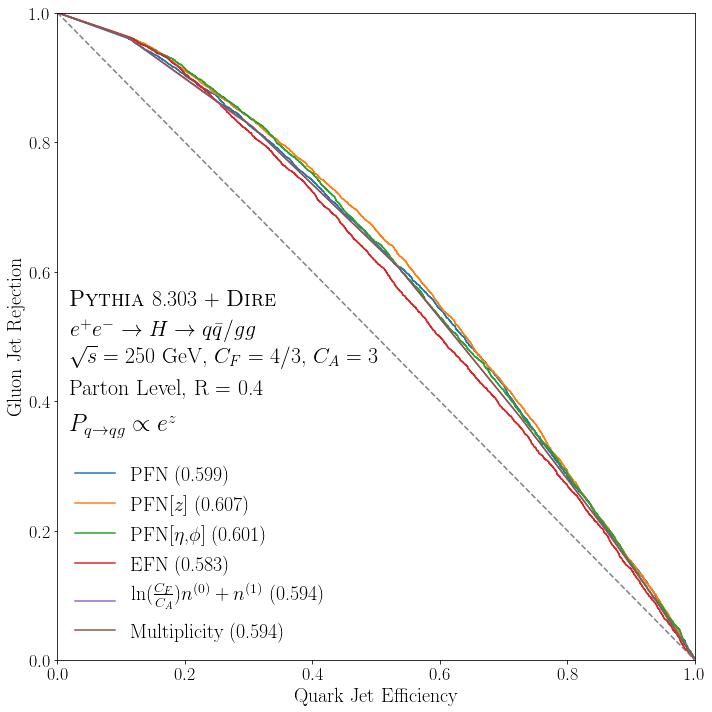

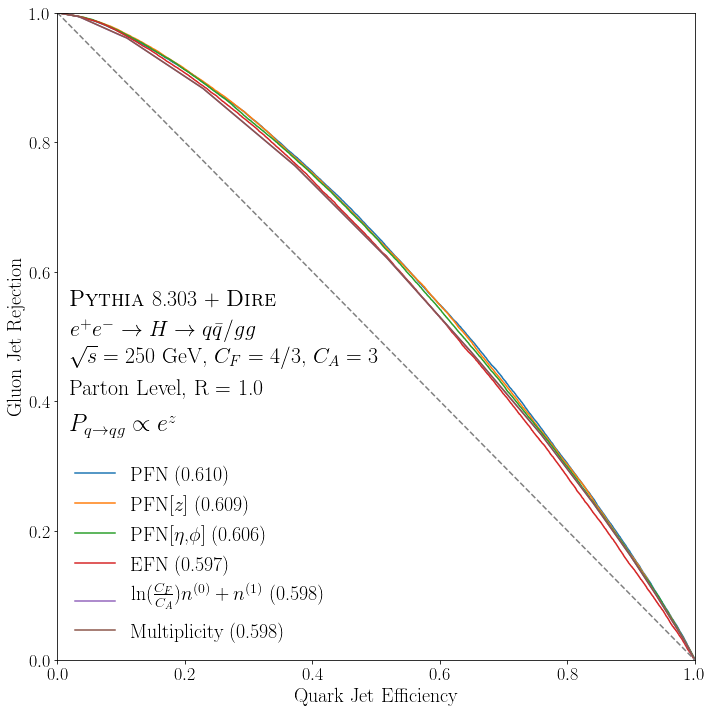

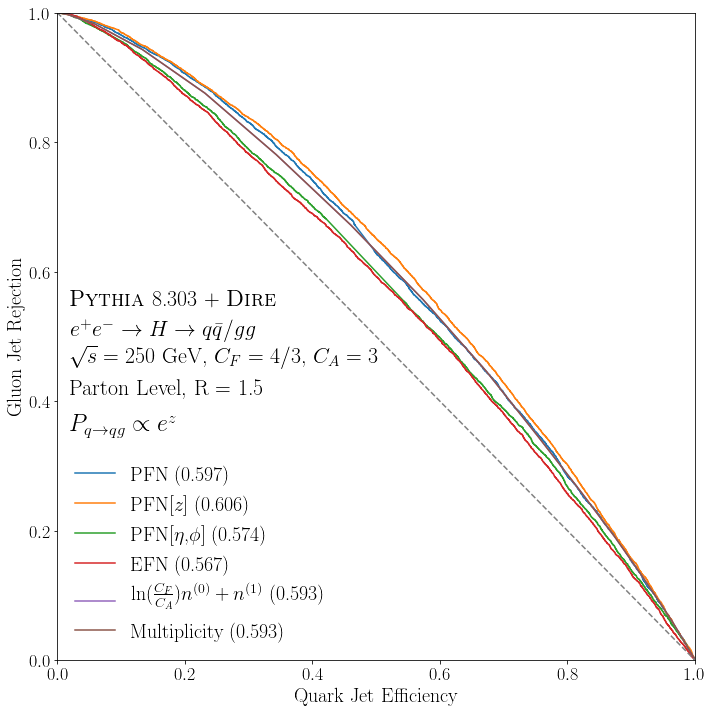

In [5]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20)
    plotting.stamp(0.02,0.6,fontsize=22,delta_y=0.045,line_3=line_3,radius=rads[i])
    plt.text(0.02,0.35,split,fontsize=24)
    plt.savefig('plots/ROCs_CF1.3CA3.0_sqg0100-esq0010-r'+str(rads[i])+'.pdf')

In [8]:
shan_roc_r4, shan_auc_r4 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0010-r0.4','H2gg-CF3.0CA3.0-sqg0100-r0.4',f_shan)
rocs_r4.append(shan_roc_r4)
aucs_r4.append(shan_auc_r4)
labels_r4.append(pred_shan)
shan_roc_r1, shan_auc_r1 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sqg0100-esq0010-r1.0','H2gg-CF3.0CA3.0-sqg0100-r1.0',f_shan,suffix='/total_1M.root')
rocs_r1.append(shan_roc_r1)
aucs_r1.append(shan_auc_r1)
labels_r1.append(pred_shan)
shan_roc_r15, shan_auc_r15 = analysis.run_custom_obs('H2qq-CF1.3CA3.0-sq0100-esq0010-r1.5','H2gg-CF3.0CA3.0-sqg0100-r1.5',f_shan)
rocs_r15.append(shan_roc_r15)
aucs_r15.append(shan_auc_r15)
labels_r15.append(pred_shan)

Loaded files at 0.0859532356262207
Read in arrays at 1.634321689605713
Cleaned events at 1.715000867843628
Made quark/gluon input arrays at 1.7735316753387451
Finished preprocessing at 2.4030892848968506
Loaded files at 0.13386750221252441
Read in arrays at 16.374215841293335
Cleaned events at 17.145193815231323
Made quark/gluon input arrays at 17.923927068710327
Finished preprocessing at 28.542465686798096
Loaded files at 0.05633997917175293
Read in arrays at 1.6606717109680176
Cleaned events at 1.7408368587493896
Made quark/gluon input arrays at 1.8321070671081543
Finished preprocessing at 3.1860506534576416


In [7]:
rocs_r4.pop()
aucs_r4.pop()
labels_r4.pop()
rocs_r1.pop()
aucs_r1.pop()
labels_r1.pop()
rocs_r15.pop()
aucs_r15.pop()
labels_r15.pop()

'$\\ln(\\frac{C_F}{C_A})n^{(0)} + n_S^{(1)}$'

Text(0.02, 0.25, '$P_{q \\to qg} \\propto e^{z}$')

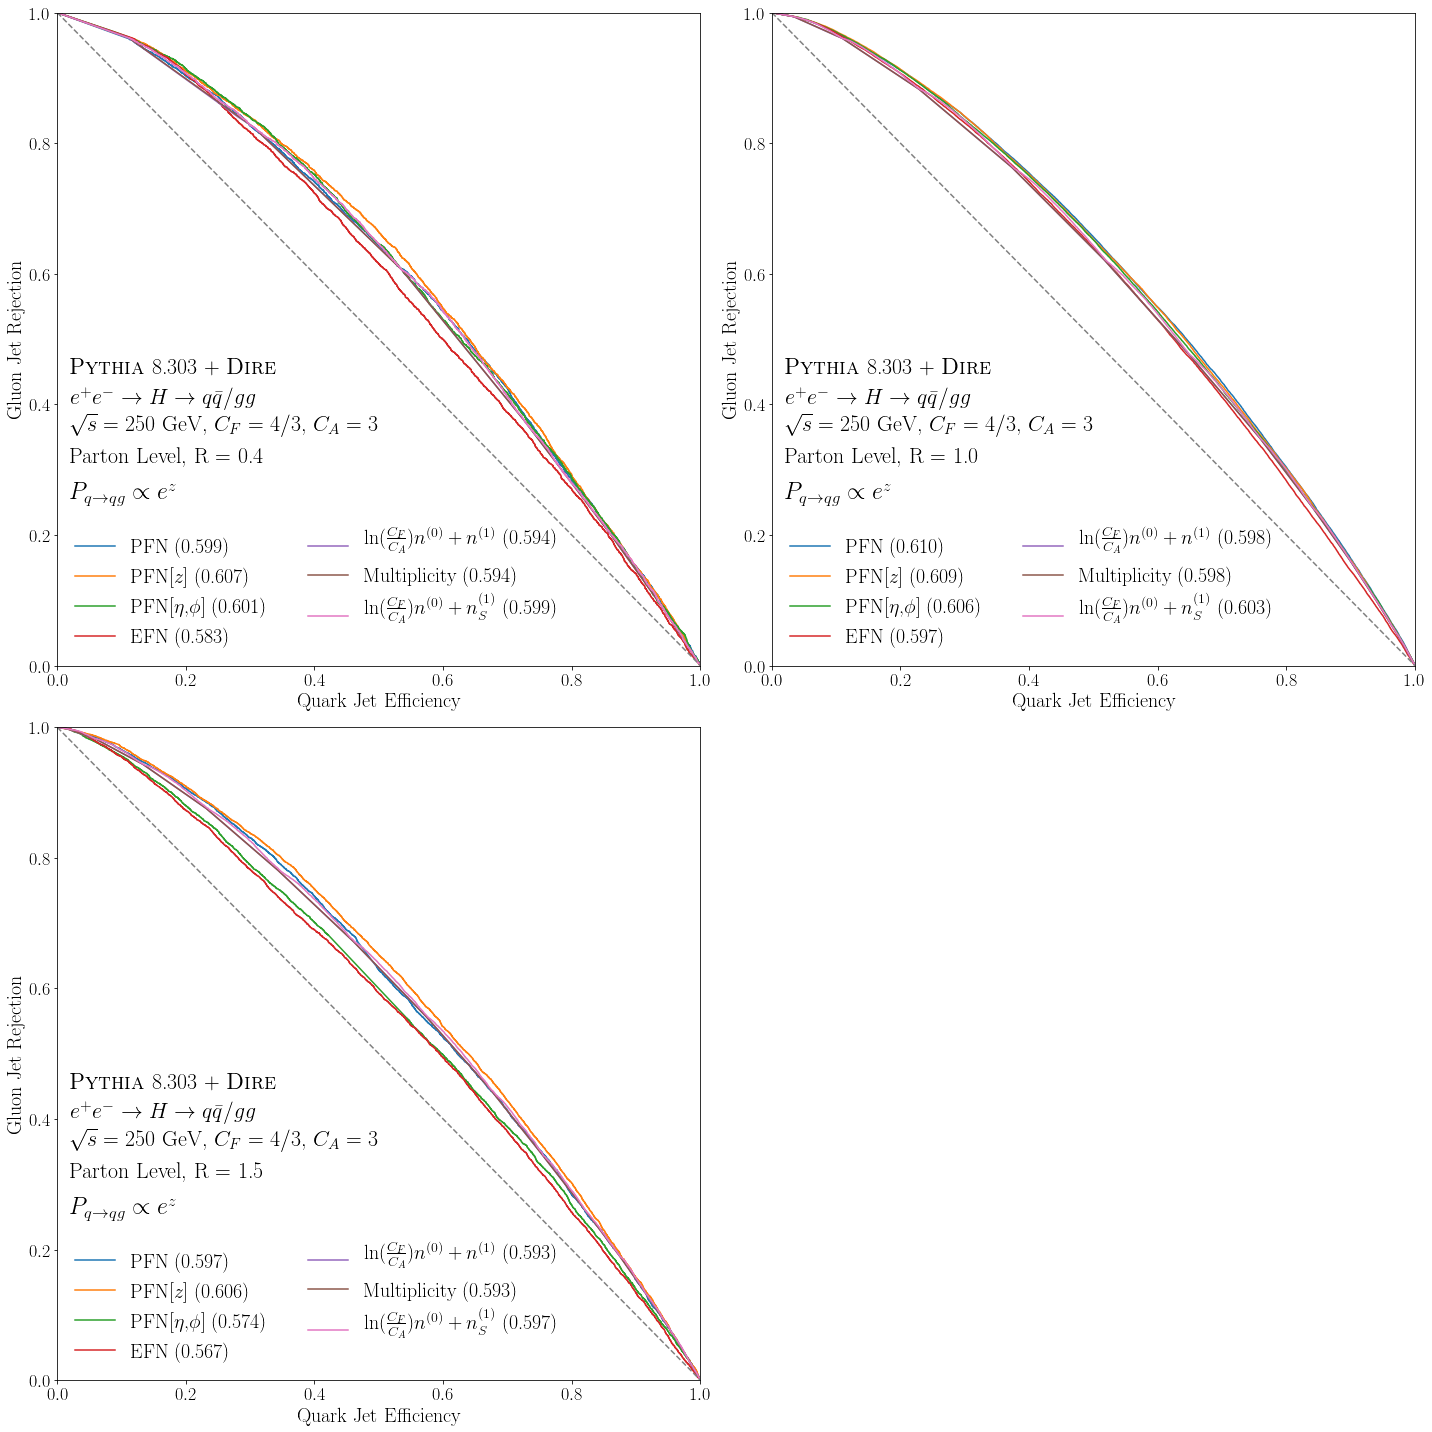

In [9]:
importlib.reload(plotting)
fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot(221)
plotting.plot_many(rocs_r4,aucs_r4,labels_r4,ax1,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)
ax2 = plt.subplot(222)
plotting.plot_many(rocs_r1,aucs_r1,labels_r1,ax2,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,radius=1.0,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)
ax3 = plt.subplot(223)
plotting.plot_many(rocs_r15,aucs_r15,labels_r15,ax3,fontsize=20,ncol=2)
plotting.stamp(0.02,0.5,radius=1.5,fontsize=22,delta_y=0.045,line_3=line_3)
plt.text(0.02,0.25,split,fontsize=24)

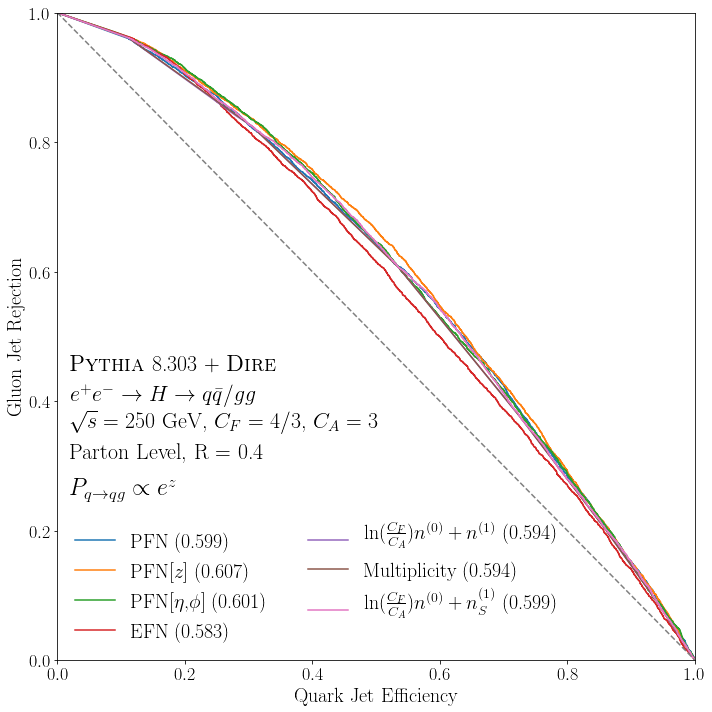

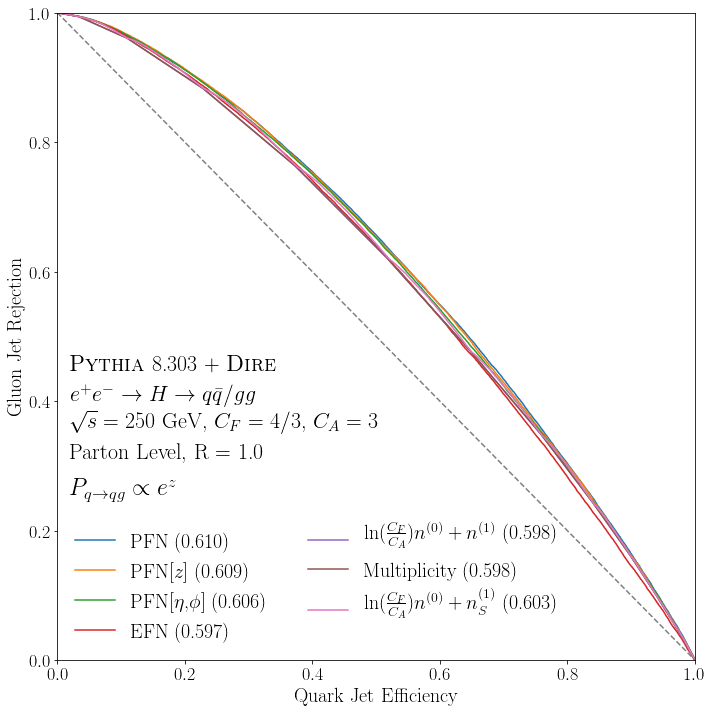

In [ ]:
roc_list = [rocs_r4,rocs_r1,rocs_r15]
auc_list = [aucs_r4,aucs_r1,aucs_r15]
lab_list = [labels_r4,labels_r1,labels_r15]
rads = [0.4,1.0,1.5]
for i in range(len(roc_list)):
    plt.figure(figsize=(10,10))
    ax = plt.gca()
    rocs,aucs,labels = roc_list[i],auc_list[i],lab_list[i]
    plotting.plot_many(rocs,aucs,labels,ax,fontsize=20,ncol=2)
    plotting.stamp(0.02,0.5,fontsize=22,delta_y=0.045,line_3=line_3,radius=rads[i])
    plt.text(0.02,0.25,split,fontsize=24)
    plt.savefig('plots/ROCs_CF1.3CA3.0_withshan_sqg0100-esq0010-r'+str(rads[i])+'.pdf')